## gamma線20 MeVで照射した場合

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os 
sys.path.append("/home/yoshida/workspace/yoshida/study/modules/")
from read_dose.ddreader import *

# Allocation GPU hardware ID = 0
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')

2023-03-02 14:16:51.807153: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-02 14:16:53.916966: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-02 14:16:53.917784: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-02 14:16:55.621206: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2023-03-02 14:16:55.621534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2023-03-02 14:1

In [2]:
dir_name = "data_08" 
theta_s = [i*10 for i in range(36)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

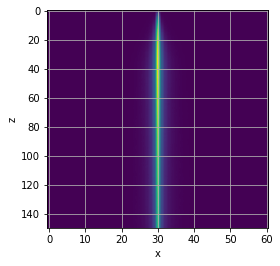

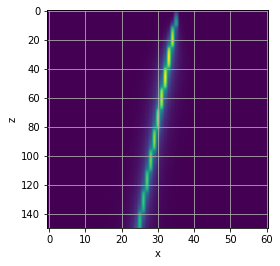

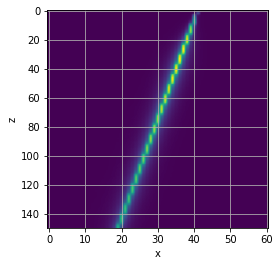

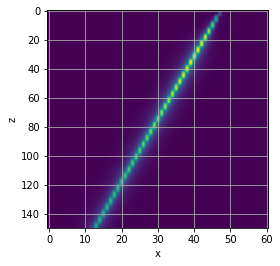

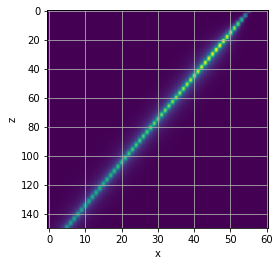

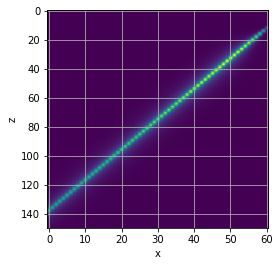

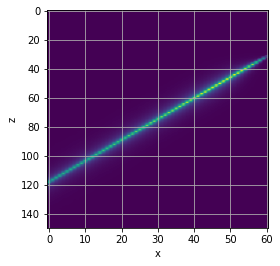

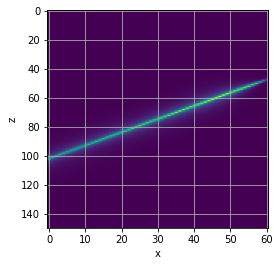

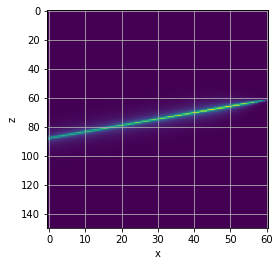

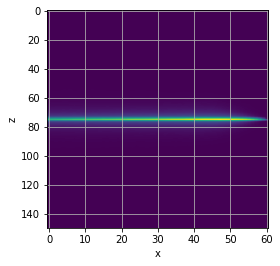

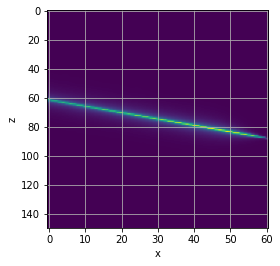

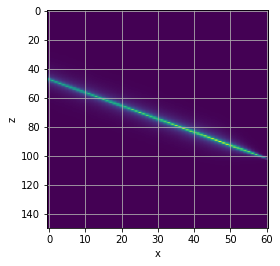

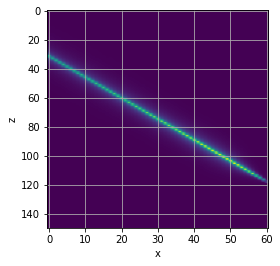

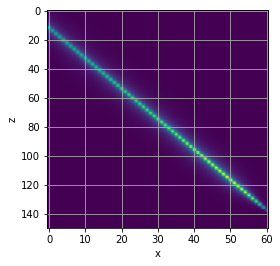

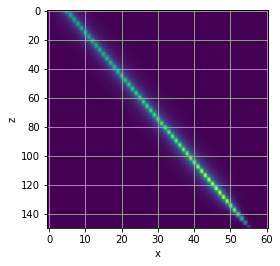

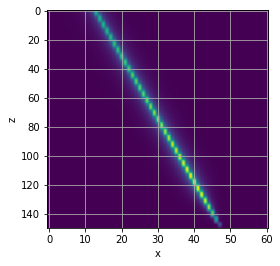

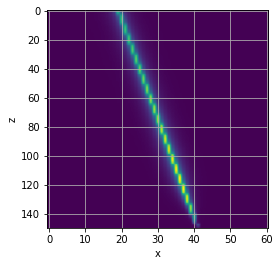

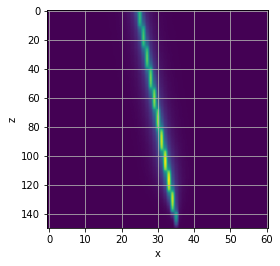

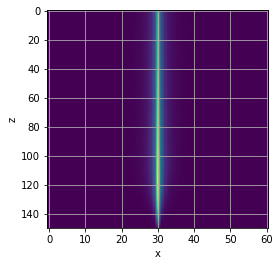

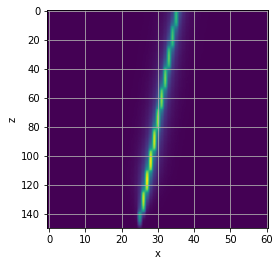

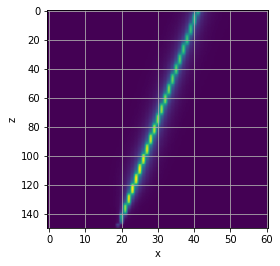

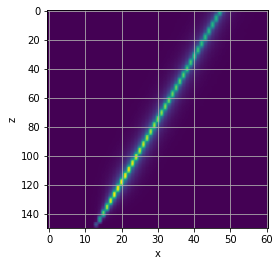

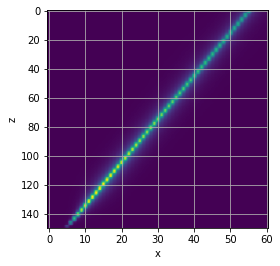

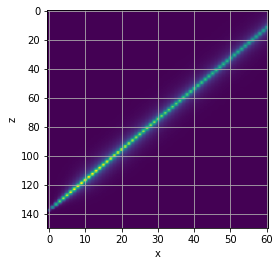

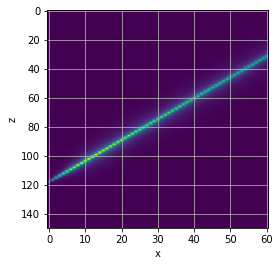

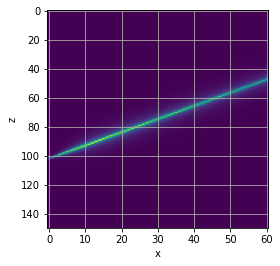

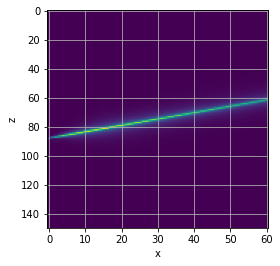

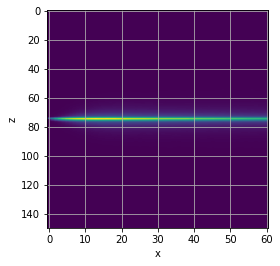

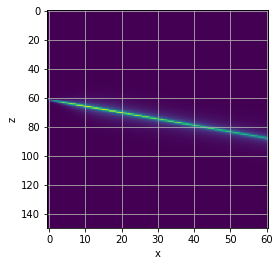

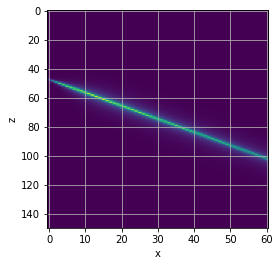

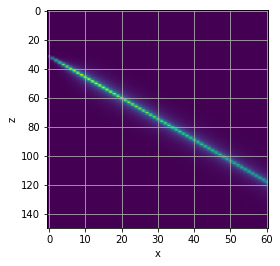

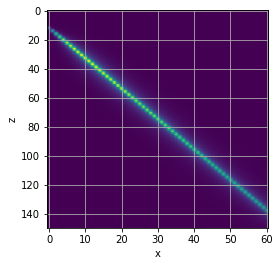

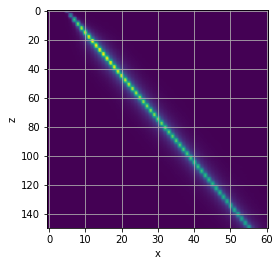

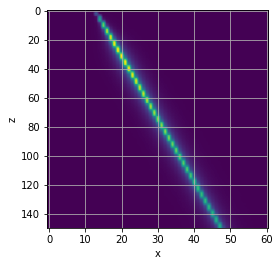

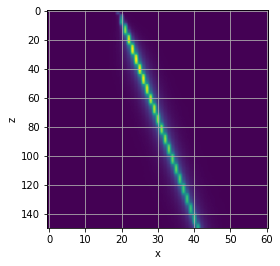

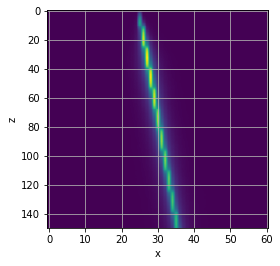

In [3]:
for i in range(36):
    dd_test = data[i]
    
    plt.imshow(dd_test.reshape(150,61,61).sum(2), aspect=0.4)
    plt.ylabel("z")
    plt.xlabel("x")
    plt.grid()
    plt.show()
    plt.close()

幅を持っていないため、実際とはかけ離れているように見える。

等方的なビームを作成する必要がある。

In [4]:
dir_name = str("data_08") 
theta_s = [i for i in range(360)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

In [5]:
data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

In [6]:
itr = np.random.randint(0, len(data), [100,2])

x_test = np.array([data[i[0]] + data[i[1]] for i in itr])

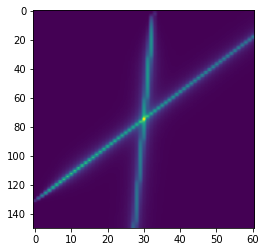

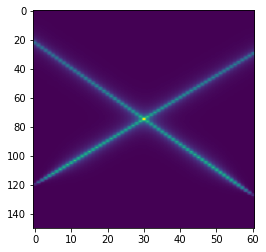

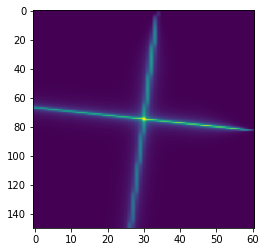

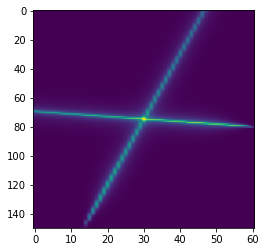

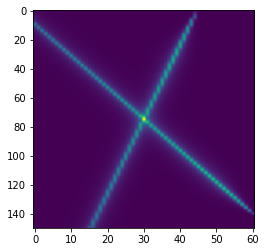

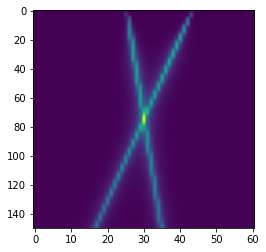

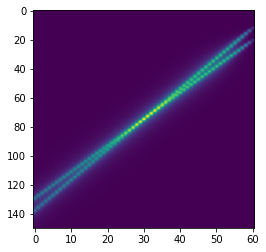

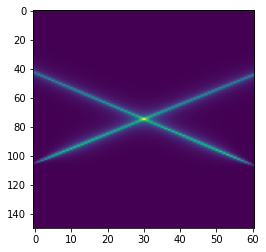

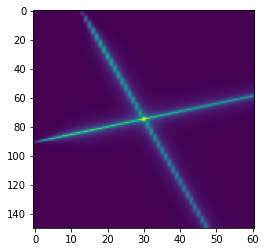

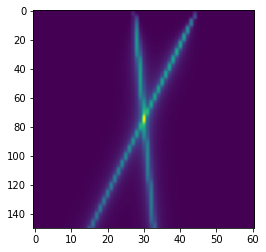

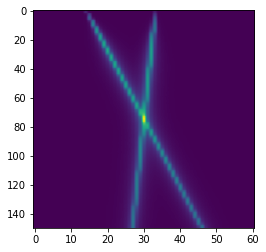

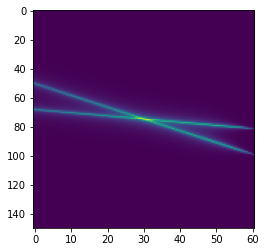

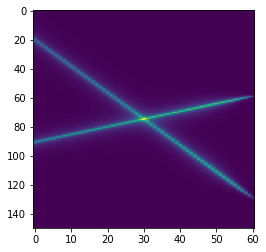

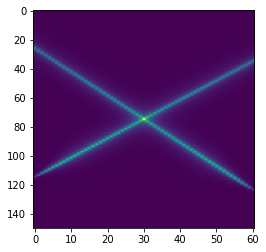

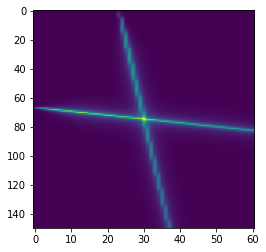

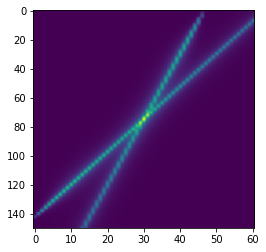

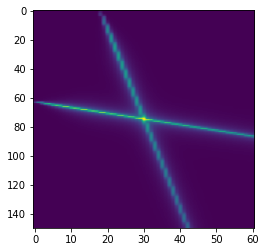

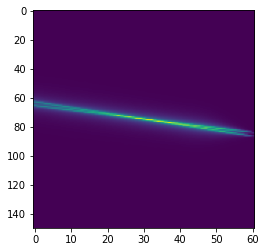

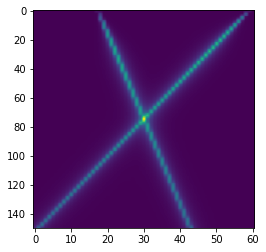

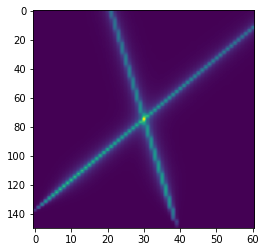

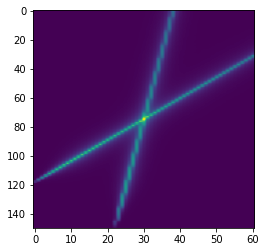

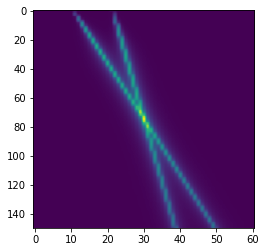

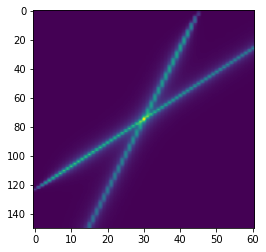

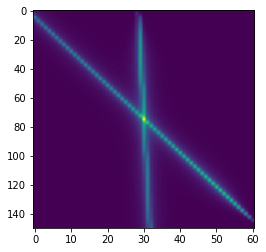

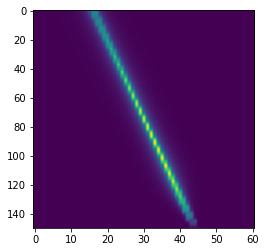

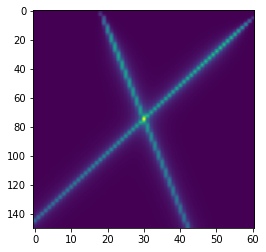

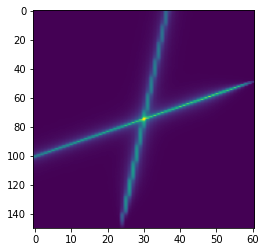

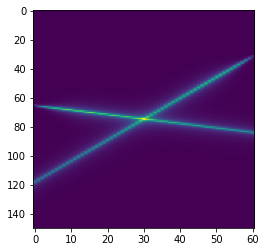

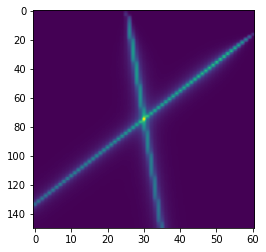

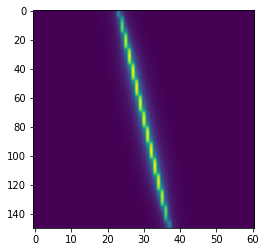

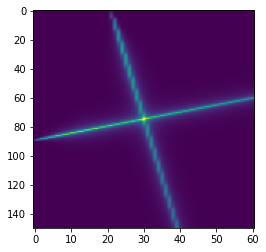

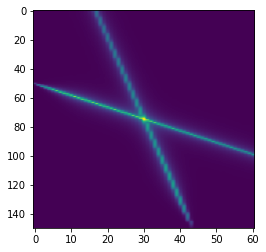

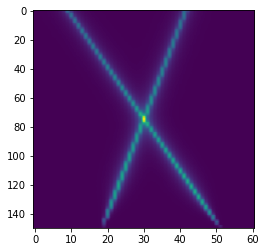

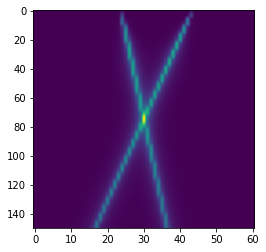

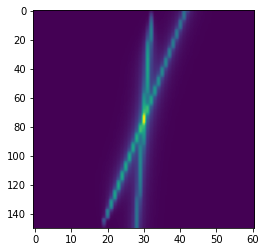

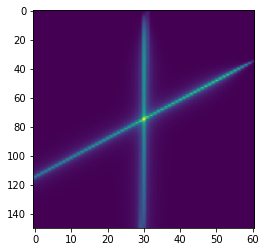

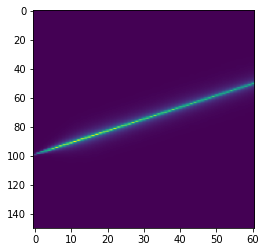

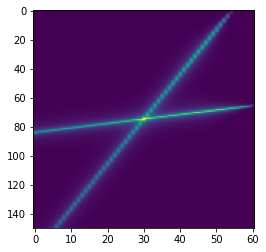

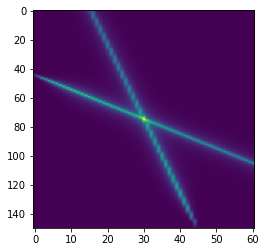

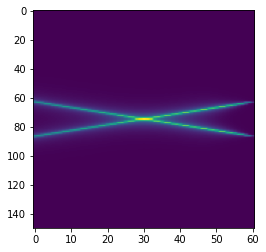

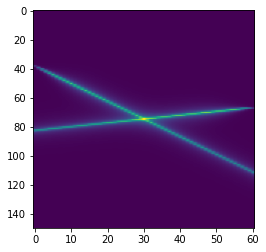

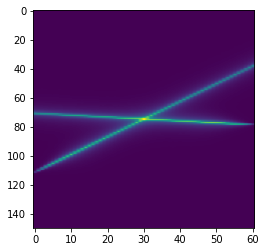

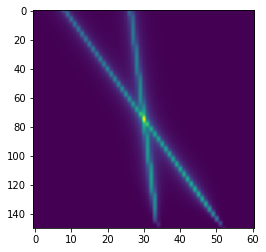

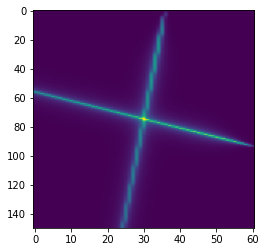

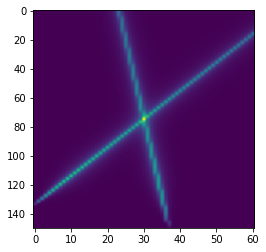

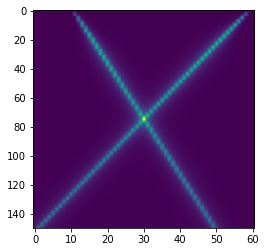

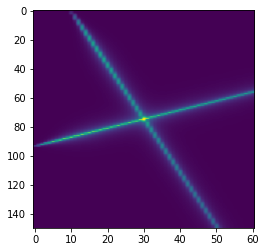

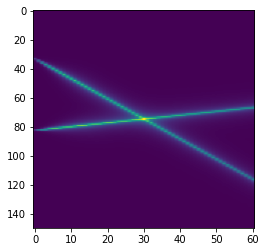

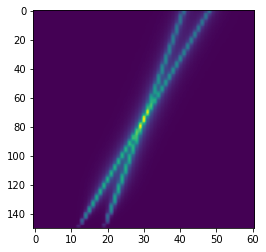

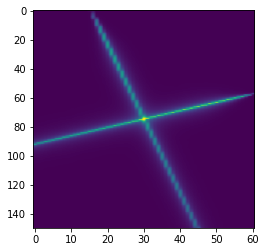

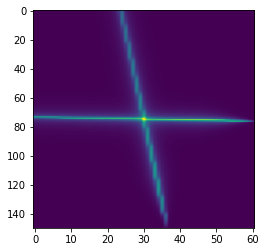

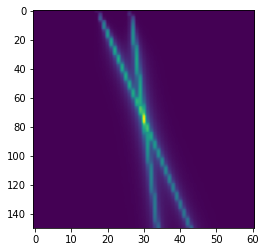

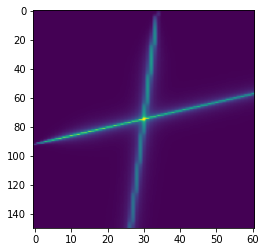

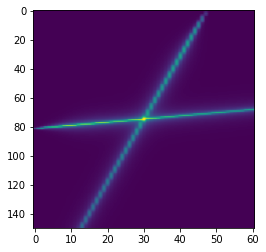

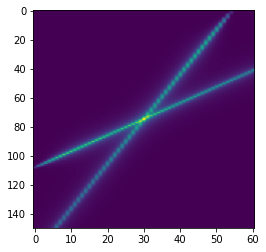

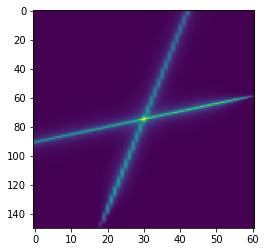

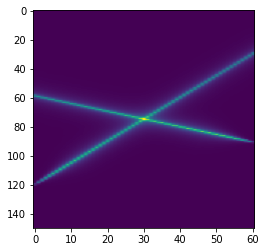

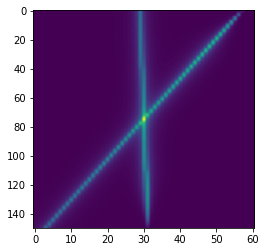

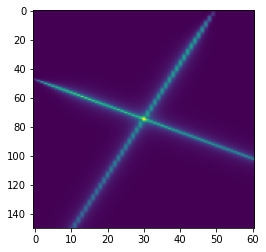

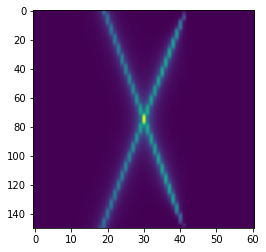

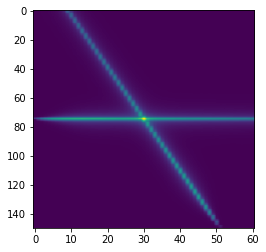

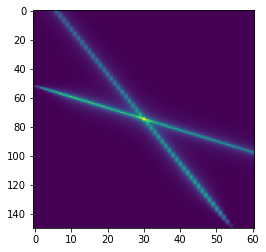

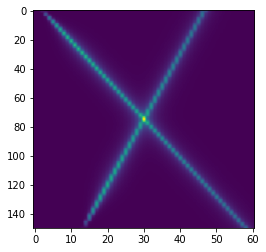

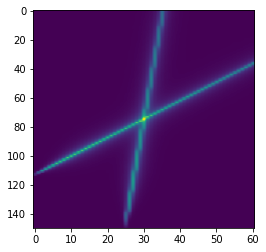

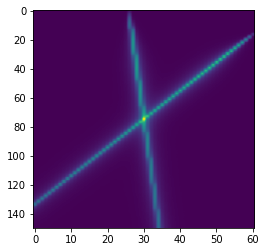

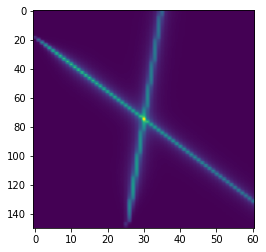

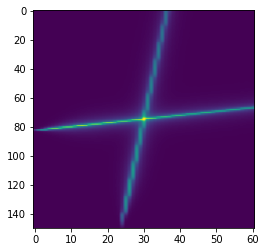

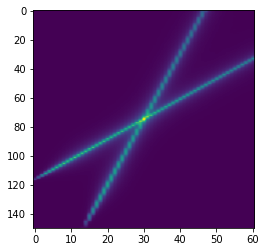

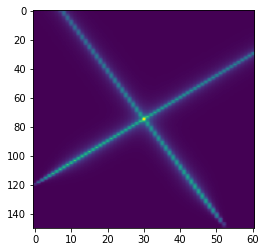

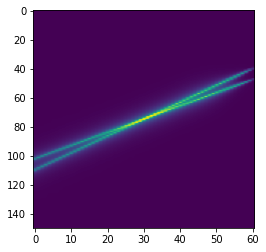

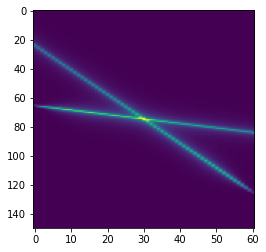

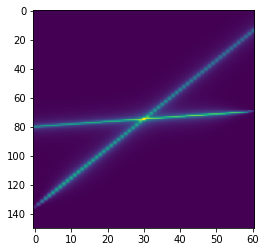

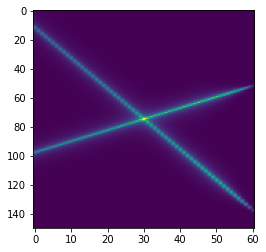

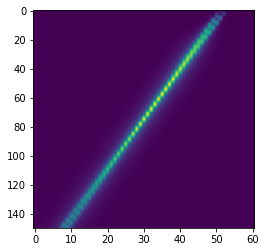

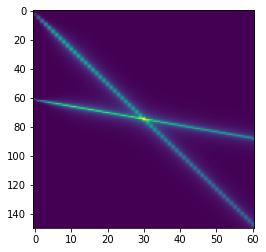

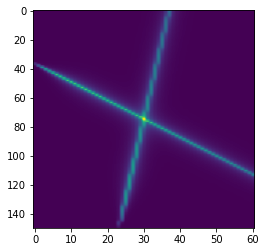

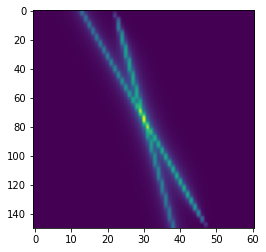

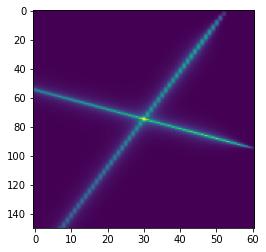

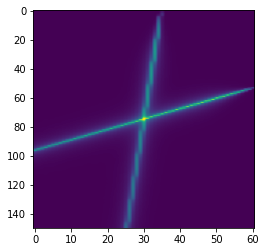

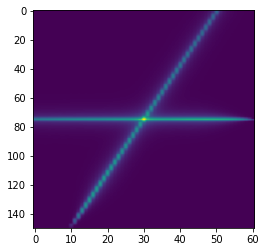

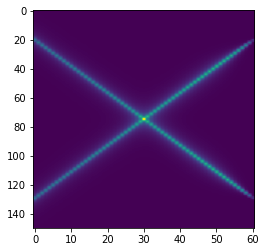

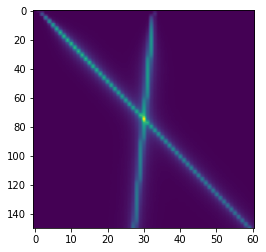

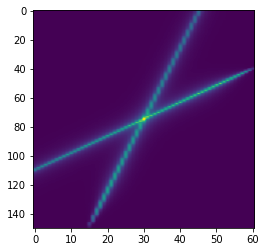

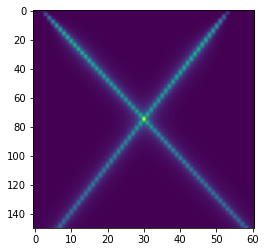

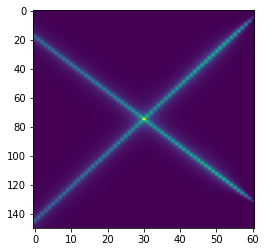

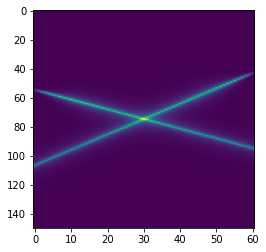

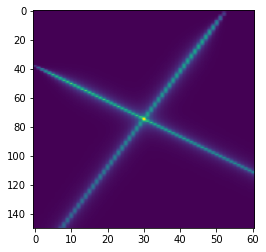

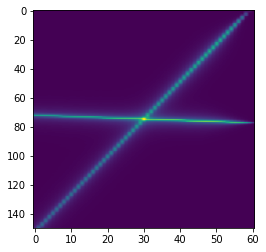

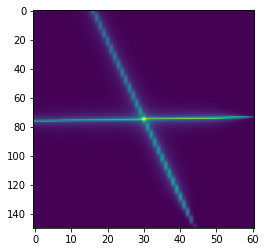

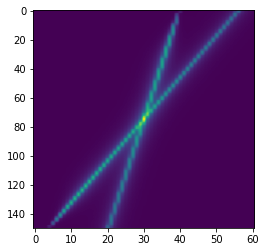

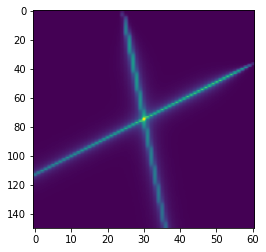

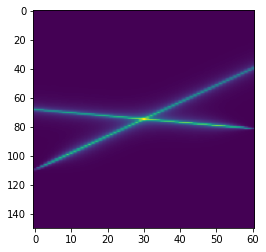

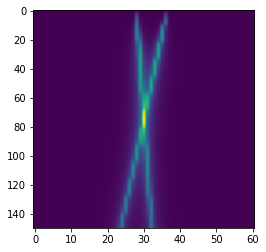

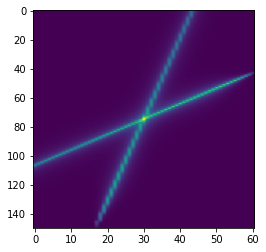

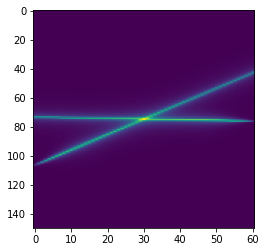

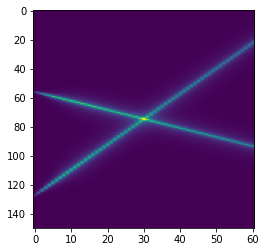

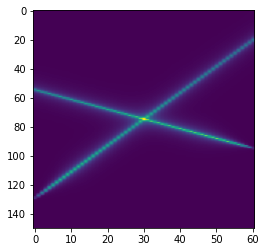

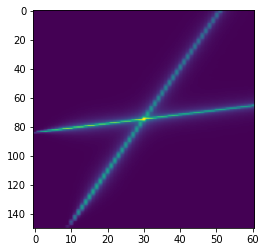

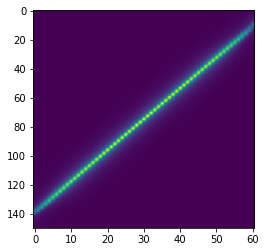

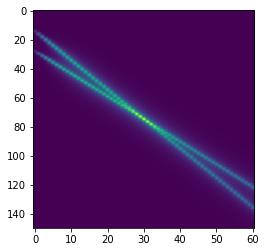

In [7]:
for i in range(len(x_test)):
    plt.imshow(x_test[i].reshape(150,61,61).sum(2), aspect=0.4)
    plt.show()
    plt.close()

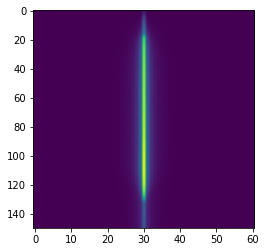

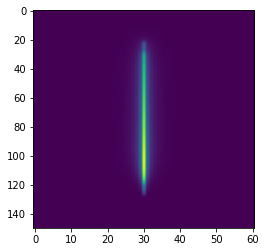

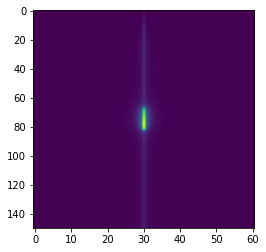

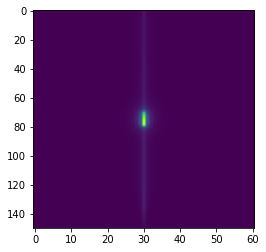

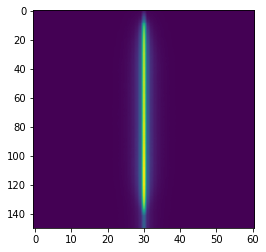

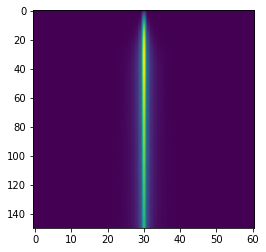

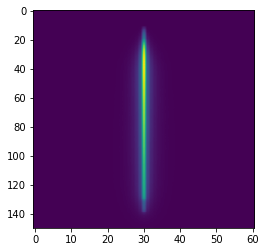

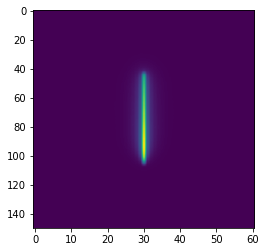

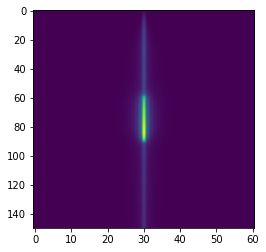

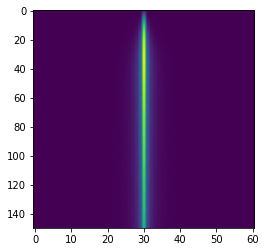

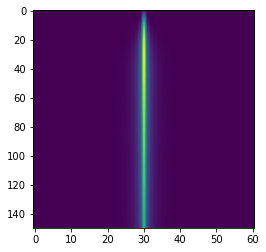

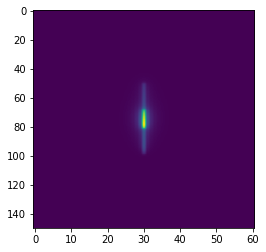

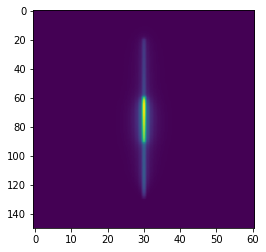

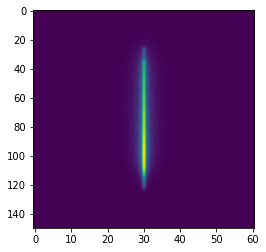

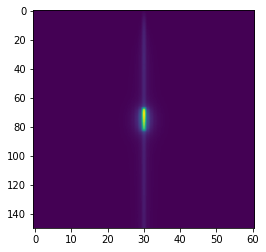

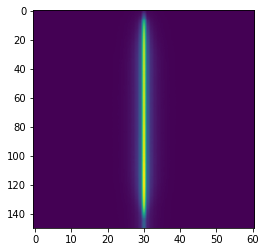

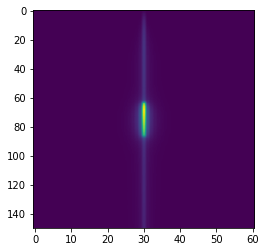

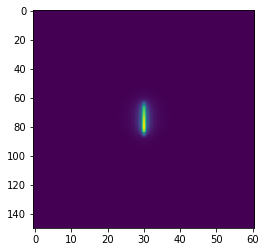

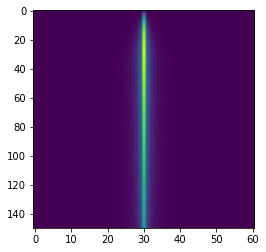

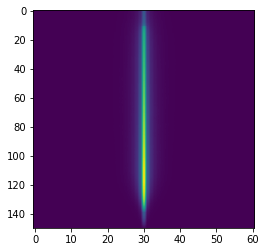

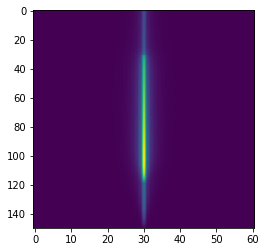

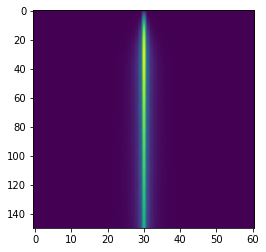

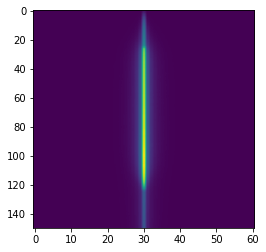

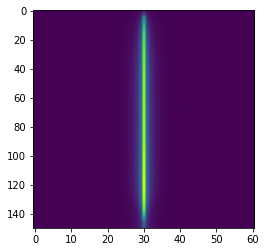

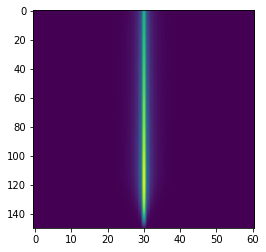

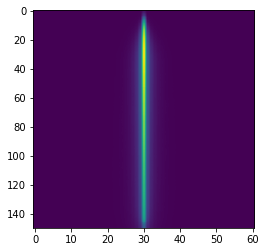

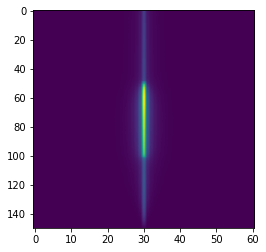

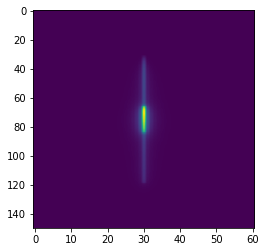

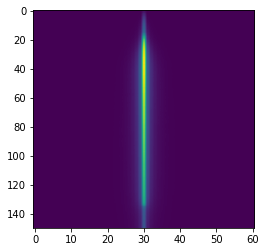

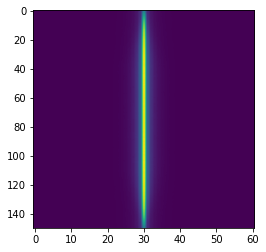

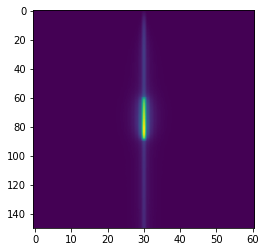

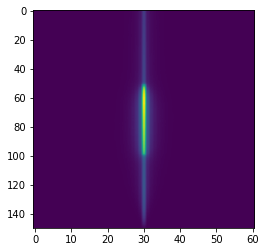

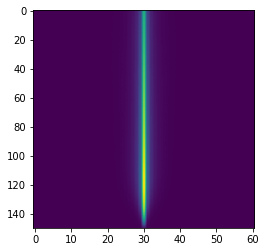

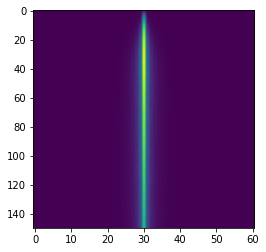

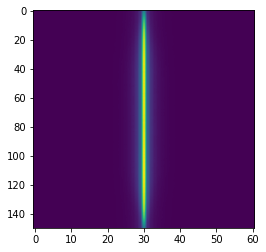

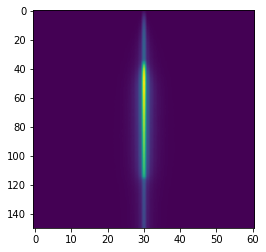

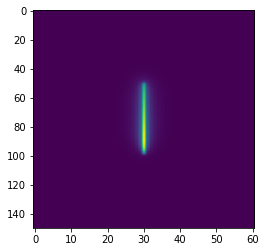

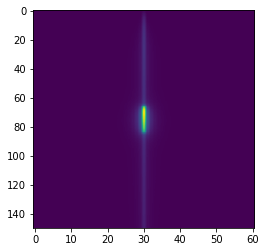

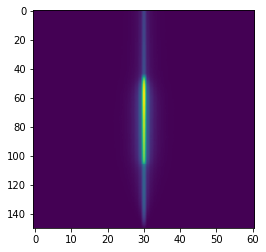

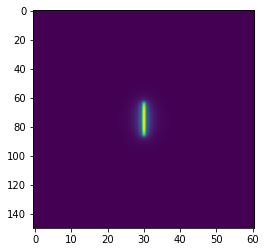

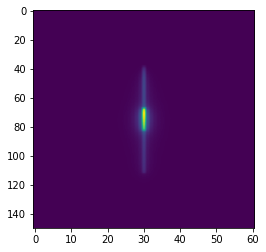

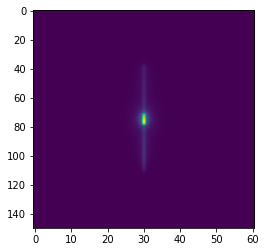

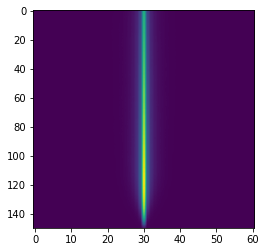

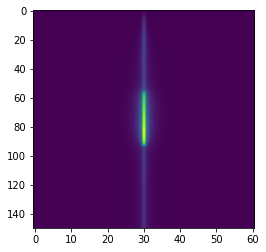

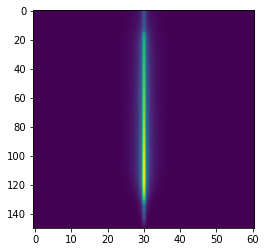

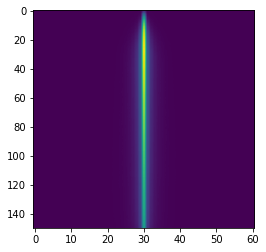

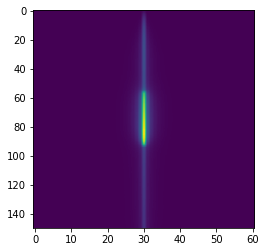

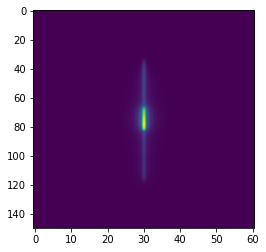

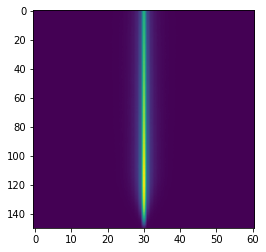

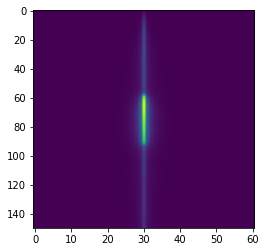

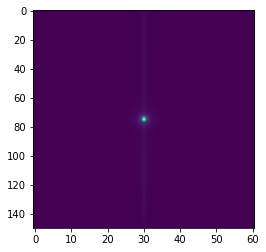

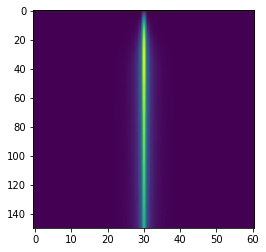

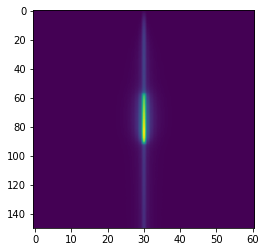

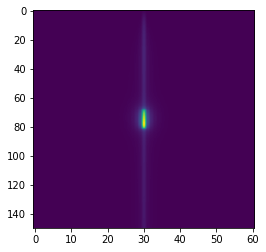

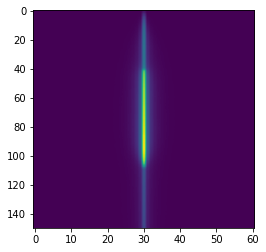

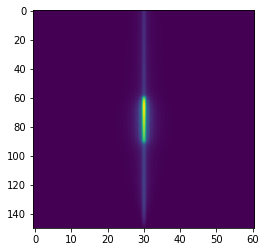

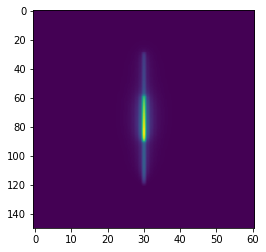

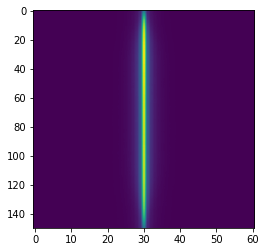

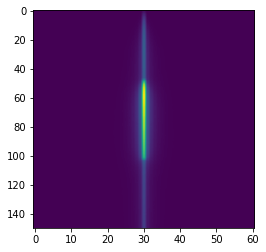

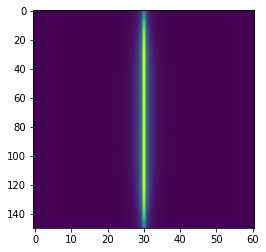

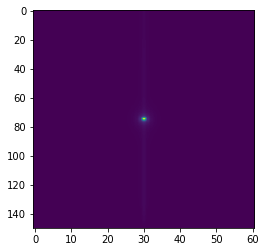

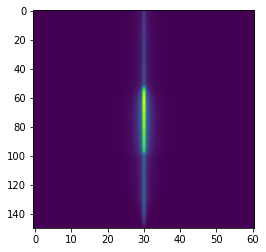

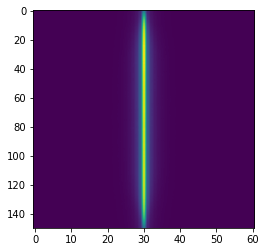

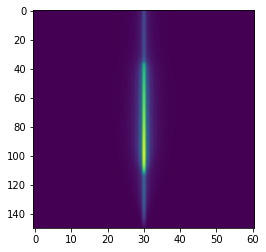

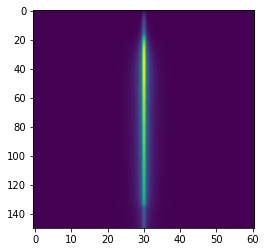

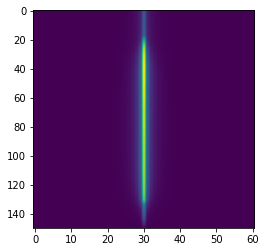

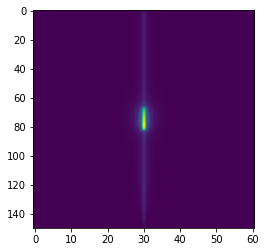

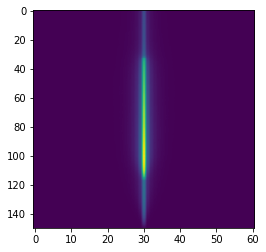

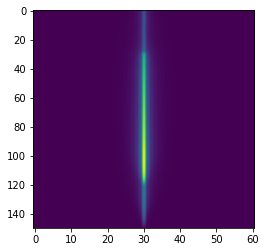

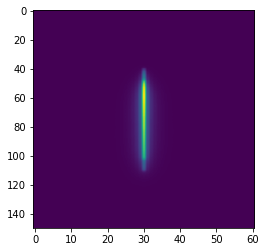

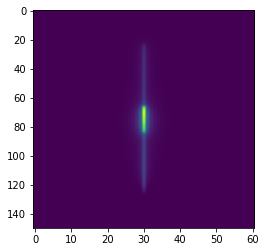

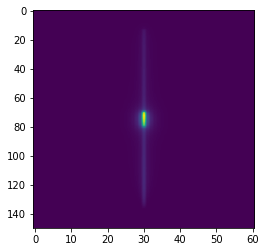

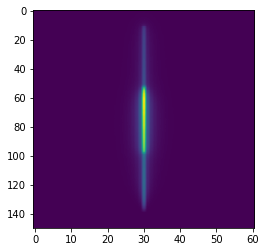

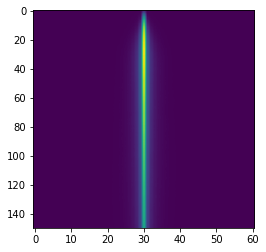

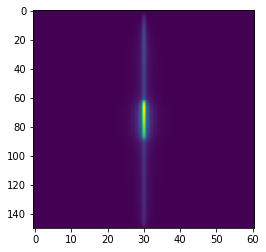

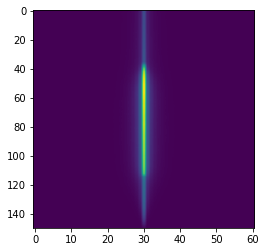

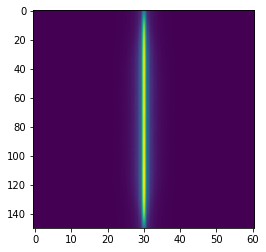

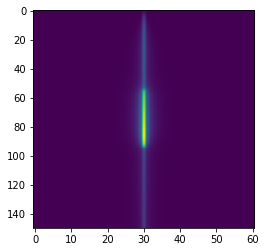

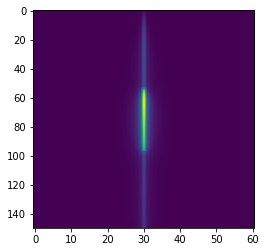

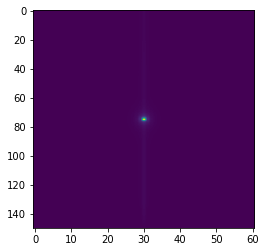

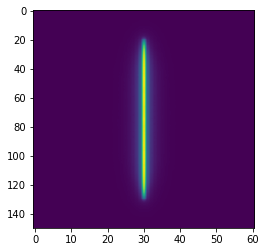

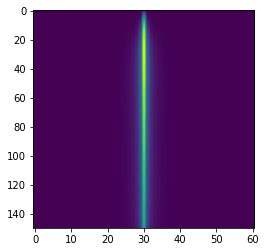

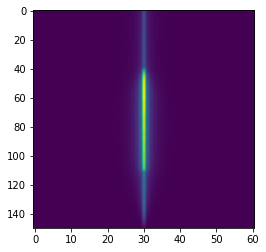

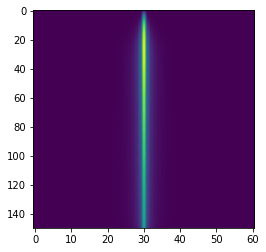

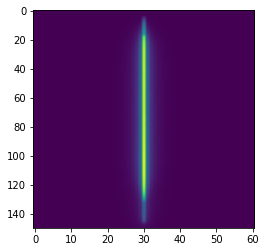

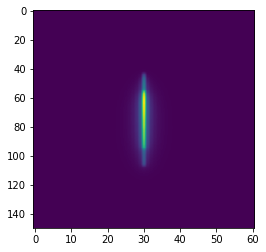

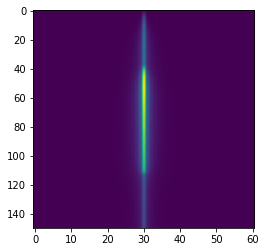

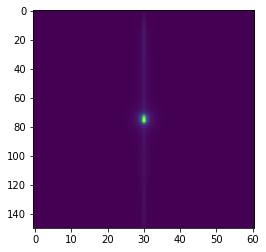

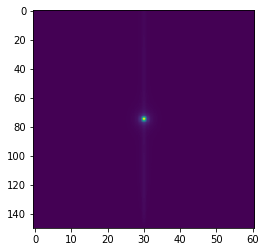

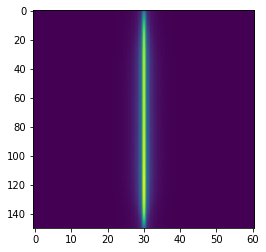

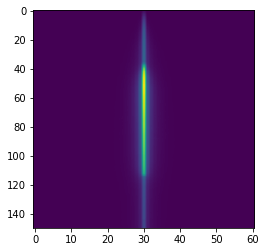

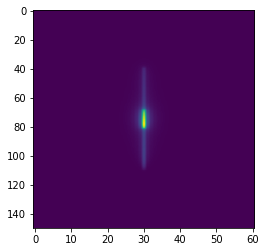

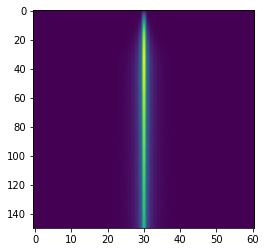

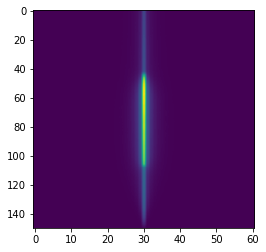

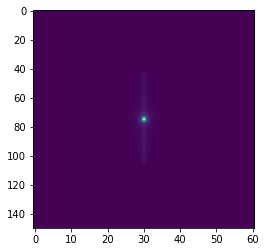

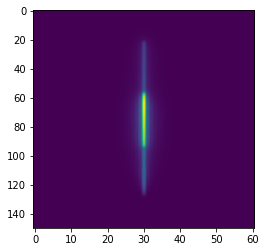

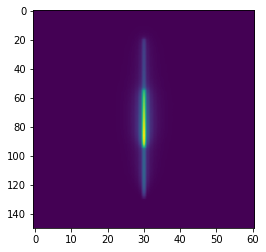

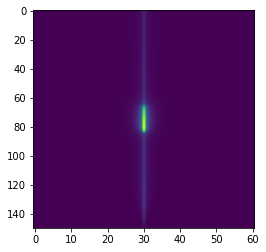

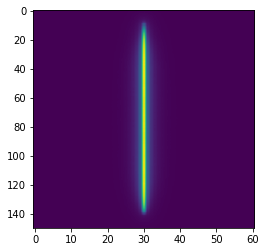

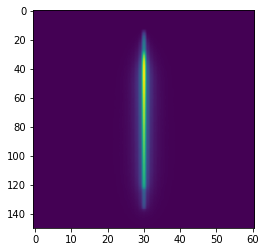

In [8]:
for i in range(len(x_test)):
    plt.imshow(x_test[i].reshape(150,61,61).sum(1), aspect=0.4)
    plt.show()
    plt.close()

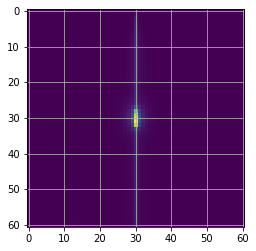

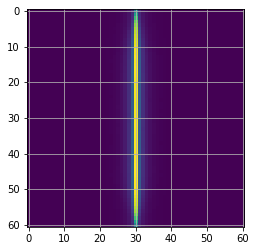

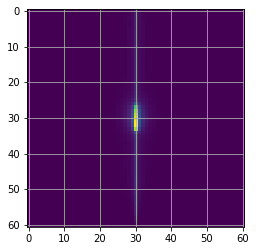

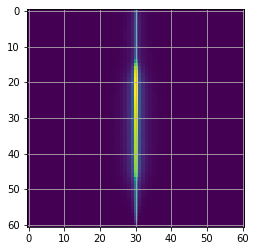

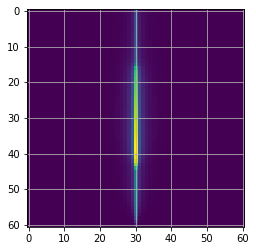

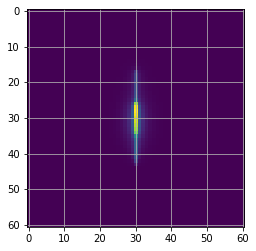

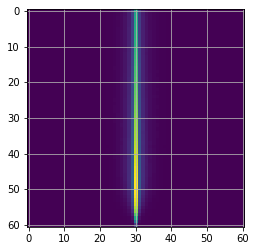

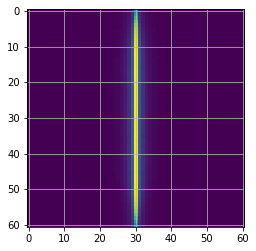

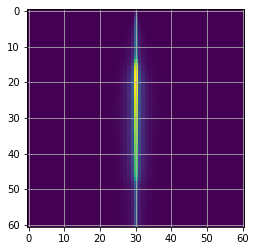

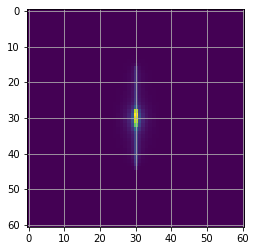

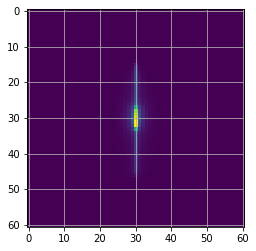

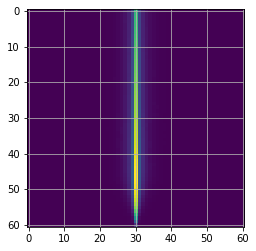

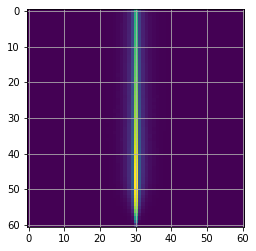

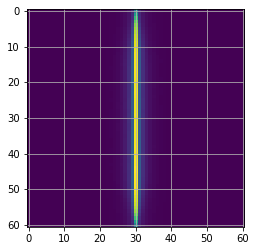

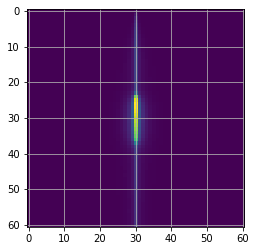

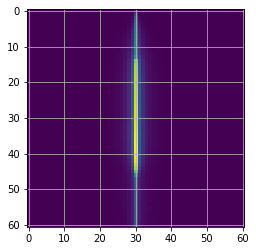

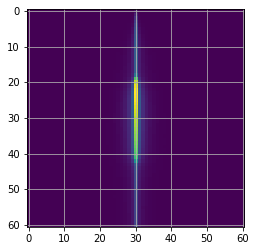

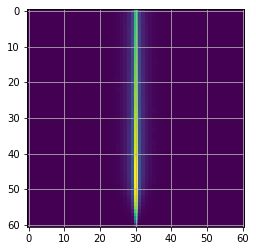

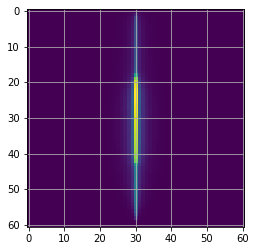

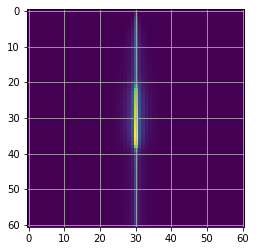

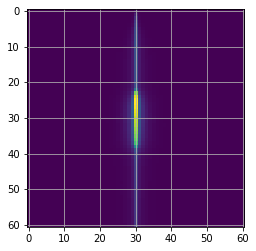

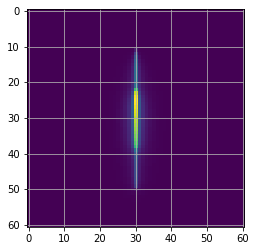

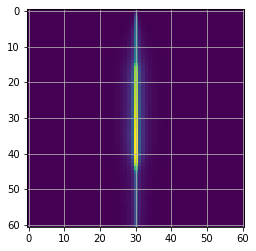

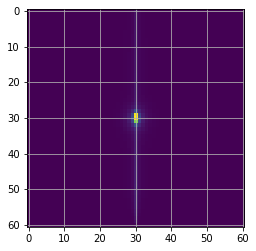

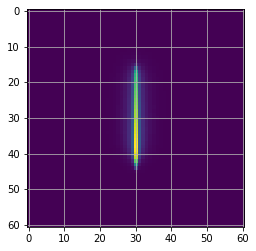

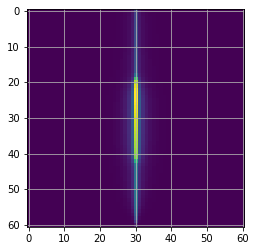

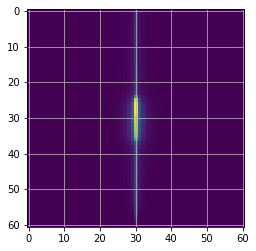

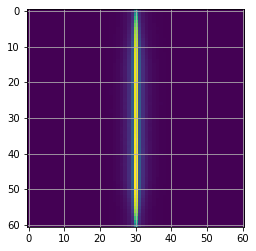

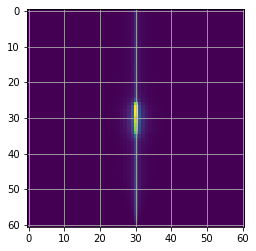

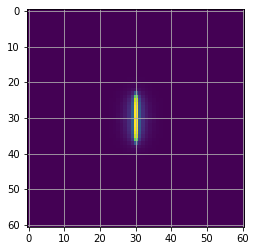

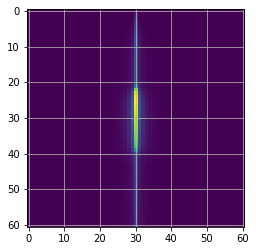

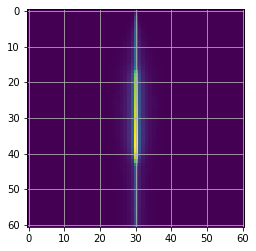

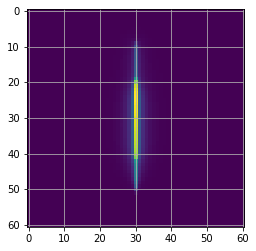

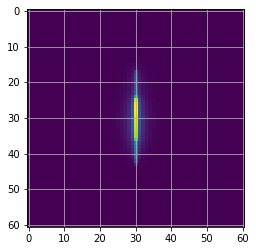

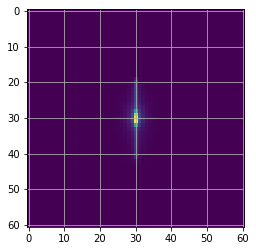

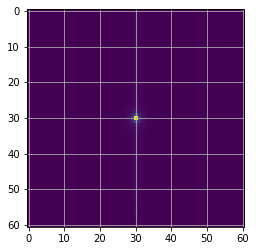

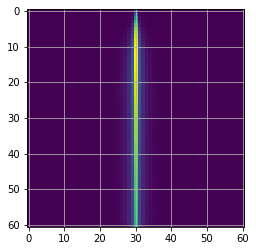

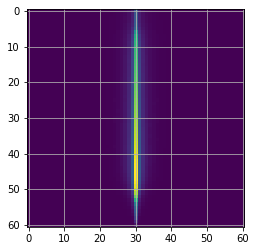

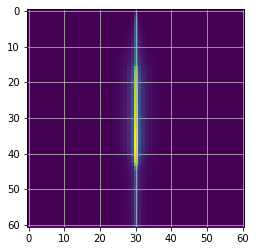

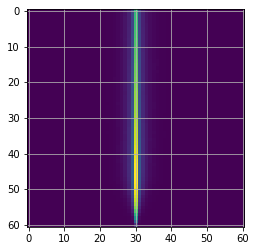

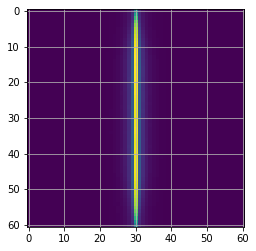

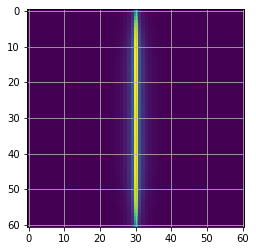

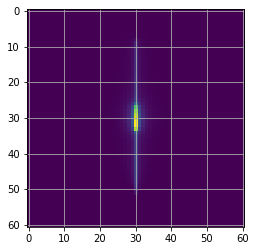

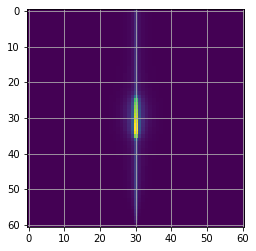

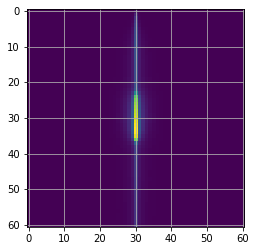

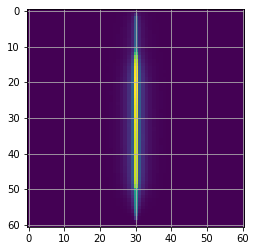

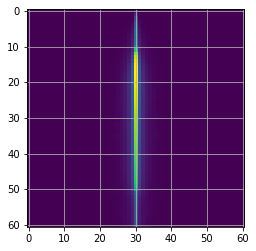

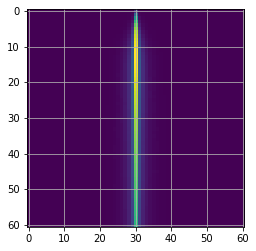

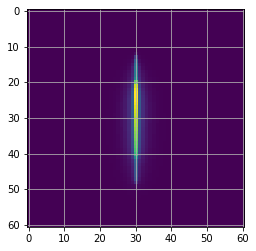

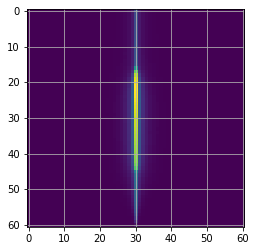

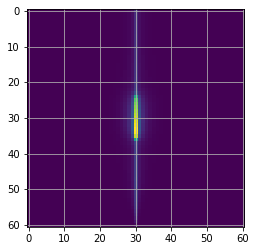

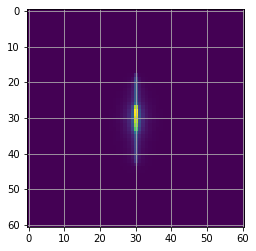

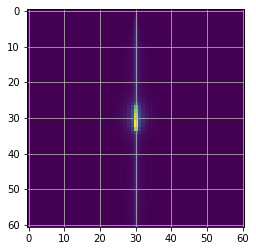

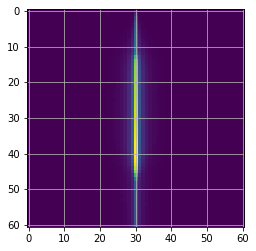

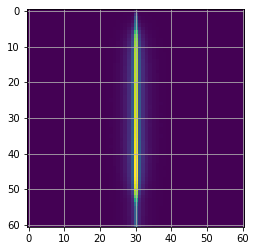

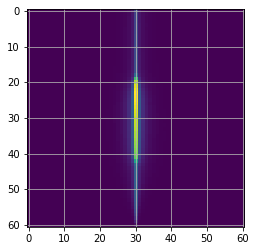

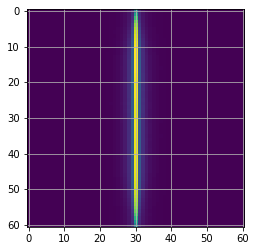

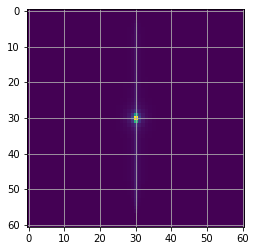

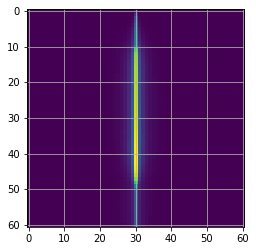

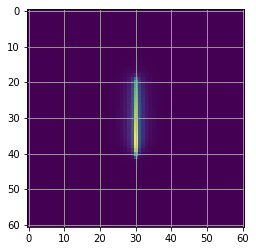

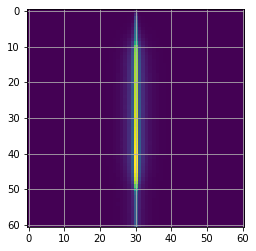

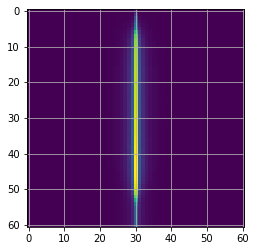

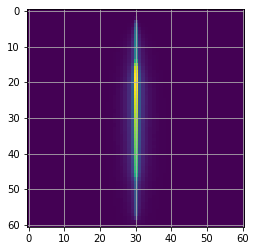

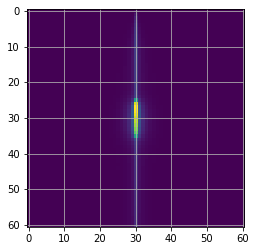

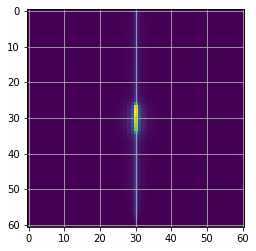

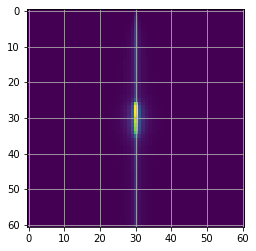

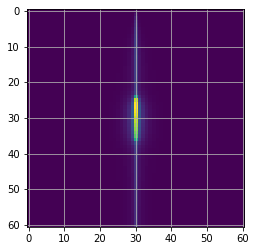

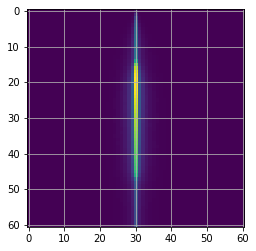

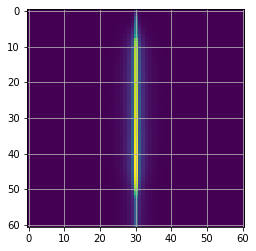

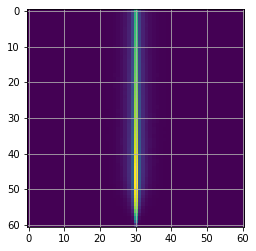

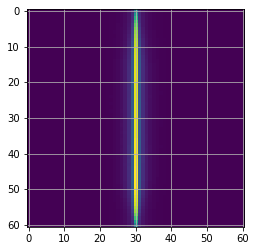

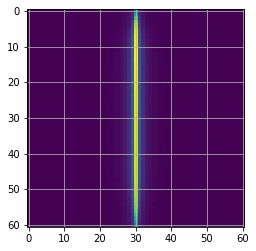

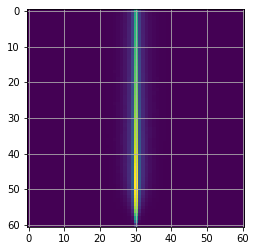

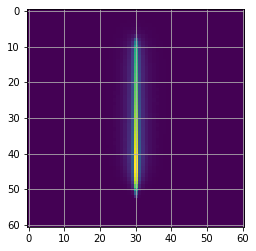

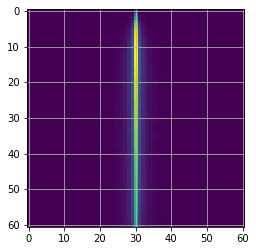

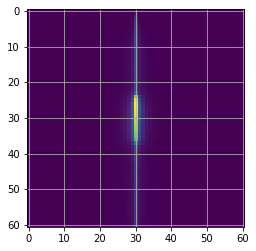

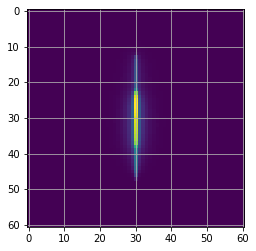

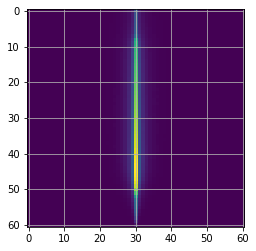

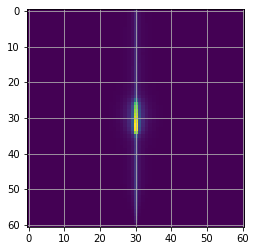

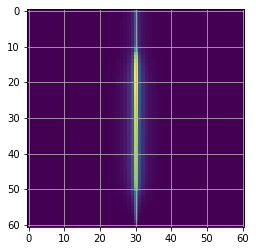

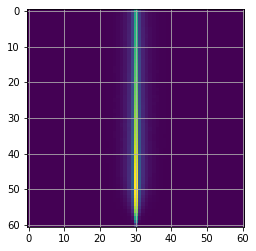

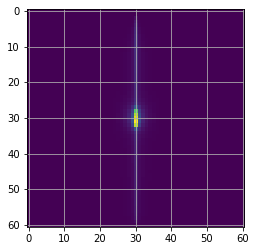

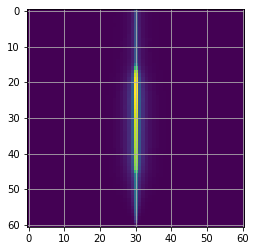

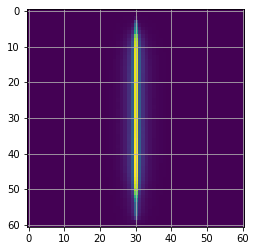

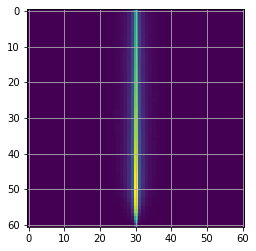

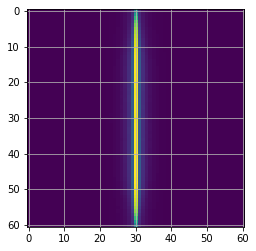

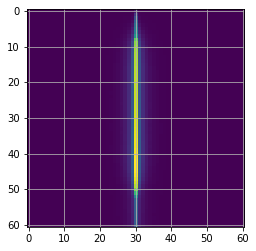

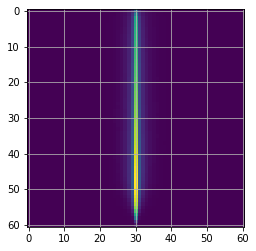

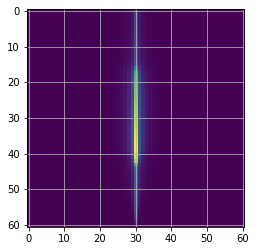

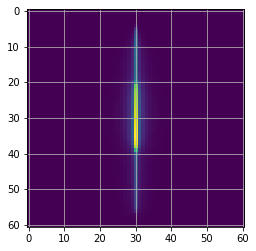

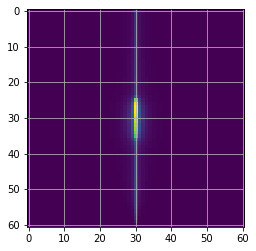

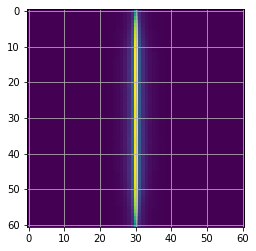

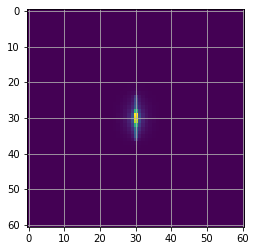

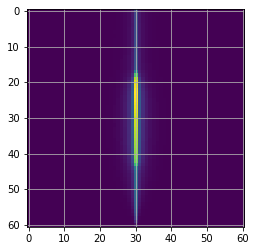

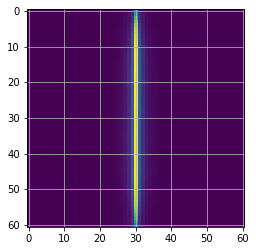

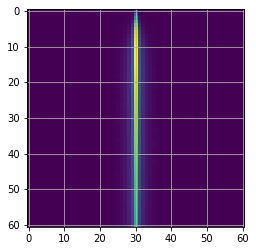

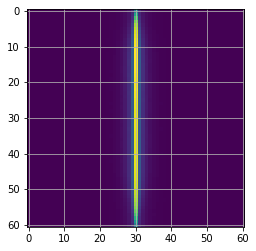

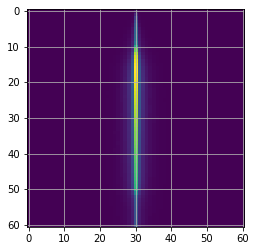

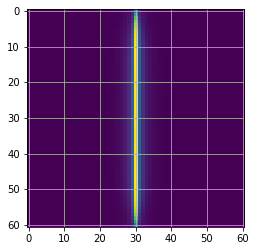

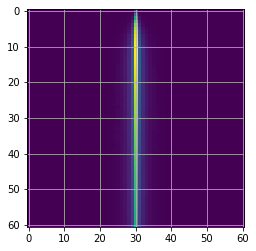

In [9]:
for i in range(len(x_test)):
    plt.imshow(x_test[i].reshape(150,61,61).sum(0))

    plt.grid()
    plt.show()
    plt.close()

In [51]:
#Input shape の定義
inp_shape = (61, 61, 150, 1)
inputs = tf.keras.Input(shape = inp_shape)

# x = layer()(x)の形で層を定義していく
x = tf.keras.layers.Conv3D(16, 2, activation = 'relu', strides = 2, name = "conv3d_1")(inputs)
x = tf.keras.layers.BatchNormalization(name = "normalize_1")(x)

x = tf.keras.layers.Conv3D(32, 2, activation = 'relu', strides = 2, name = "conv3d_2")(x)
x = tf.keras.layers.BatchNormalization(name = "normalize_2")(x)

x = tf.keras.layers.Conv3D(64, 2, activation = 'relu', strides = 2, name = "conv3d_3")(x)

x = tf.keras.layers.Flatten(name = "flatten")(x)

# 出力層を複数にする場合は、出力層 = layer()(中間層)の形にする。
theta = tf.keras.layers.Dense(360, activation='softmax', name = "theta")(x)
# phi = tf.keras.layers.Dense(91, activation='softmax'  , name = "phi"  )(x)

#ここで、modelのinputとoutputを定義する
model = tf.keras.Model(inputs=inputs, outputs= theta)

#出力層ごとにoptimizerやlossを変更できるが、全て同じで良い場合はひとつ設定すれば良い
model.compile(loss      = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(0.2))

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 61, 61, 150, 1)]  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 30, 30, 75, 16)    144       
_________________________________________________________________
normalize_1 (BatchNormalizat (None, 30, 30, 75, 16)    64        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 15, 37, 32)    4128      
_________________________________________________________________
normalize_2 (BatchNormalizat (None, 15, 15, 37, 32)    128       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 7, 7, 18, 64)      16448     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0   

In [52]:
dir_name = "data_08" 
theta_s = [5 * i for i in range(72)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

label = np.zeros((72,360))
for j in range(72):
    label[j][5 * j] = 0.5

In [53]:
for nums in range(100):
    itr = np.random.randint(0, len(data), [128,2])
    
    x_train = np.array([data[i[0]] + data[i[1]] for i in itr])
    
    t_train = np.array([label[i[0]] + label[i[1]] for i in itr])

    model.fit(x = x_train, y = t_train,
          batch_size = 2**13,
          epochs     = 20)
    print(nums)

Epoch 1/20
1/1 [==============================] - 1s 912ms/step - loss: 0.7609
Epoch 2/20
1/1 [==============================] - 0s 217ms/step - loss: 0.2062
Epoch 3/20
1/1 [==============================] - 0s 173ms/step - loss: 0.1165
Epoch 4/20
1/1 [==============================] - 0s 173ms/step - loss: 0.0804
Epoch 5/20
1/1 [==============================] - 0s 220ms/step - loss: 0.0615
Epoch 6/20
1/1 [==============================] - 0s 171ms/step - loss: 0.0500
Epoch 7/20
1/1 [==============================] - 0s 172ms/step - loss: 0.0425
Epoch 8/20
1/1 [==============================] - 0s 171ms/step - loss: 0.0372
Epoch 9/20
1/1 [==============================] - 0s 174ms/step - loss: 0.0332
Epoch 10/20
1/1 [==============================] - 0s 173ms/step - loss: 0.0302
Epoch 11/20
1/1 [==============================] - 0s 219ms/step - loss: 0.0278
Epoch 12/20
1/1 [==============================] - 0s 166ms/step - loss: 0.0258
Epoch 13/20
1/1 [==============================] 

In [54]:
dir_name = str("data_08") 
theta_s = [i for i in range(360)]
phi = 0

file_names = [str(dir_name)+"/"+str(theta)+","+str(phi)+".csv" for theta in theta_s]

In [55]:
data = [np.array(pd.read_csv(file_name)['dose']).reshape(61,61,150) for file_name in file_names]

data = np.array(data).astype("float32")
data = np.expand_dims(data, axis=4)

In [56]:
label = np.zeros((360,360))
for j in range(360):
    label[j][j] = 0.5

In [57]:
itr = np.random.randint(0, len(data), [100,2])

x_test = np.array([data[i[0]] + data[i[1]] for i in itr])

t_test = np.array([label[i[0]] + label[i[1]] for i in itr])    

In [58]:
t_pred = model.predict(x_test)

In [59]:
t_pred_idx = t_pred[0].argsort()[::-1]

In [60]:
pred = []
for i in range(100):
    t_pred_idx = t_pred[i].argsort()[::-1]
    pred.append([t_pred_idx[0], t_pred_idx[1]])
pred = np.array(pred)

In [61]:
print(itr.sort())
print(itr)

None
[[173 206]
 [ 61 319]
 [ 30 188]
 [ 71 202]
 [ 67 108]
 [155 297]
 [103 136]
 [ 69 311]
 [158 237]
 [172 348]
 [ 82  87]
 [225 351]
 [ 49  66]
 [222 336]
 [ 11  69]
 [ 53 323]
 [322 357]
 [ 24  98]
 [261 300]
 [ 75 357]
 [274 305]
 [ 47  86]
 [149 182]
 [ 20 250]
 [ 58 219]
 [185 255]
 [ 84 123]
 [ 33 134]
 [ 44 267]
 [ 49 348]
 [169 216]
 [ 26 313]
 [168 305]
 [235 305]
 [106 168]
 [ 14  65]
 [188 302]
 [127 350]
 [251 276]
 [ 15 140]
 [191 322]
 [  5 248]
 [182 296]
 [186 245]
 [ 61 239]
 [109 277]
 [236 286]
 [245 287]
 [110 161]
 [ 35 252]
 [ 90 145]
 [ 15 228]
 [190 218]
 [196 243]
 [318 336]
 [ 32  98]
 [215 301]
 [ 83 235]
 [193 218]
 [ 41 138]
 [296 330]
 [236 291]
 [140 217]
 [ 62 161]
 [204 263]
 [ 65 283]
 [156 189]
 [  6 297]
 [170 337]
 [274 306]
 [163 284]
 [258 262]
 [  3 121]
 [ 77 298]
 [ 35  36]
 [153 223]
 [231 282]
 [290 296]
 [119 202]
 [ 29  38]
 [130 209]
 [ 67  74]
 [ 87 355]
 [137 155]
 [ 96 170]
 [104 344]
 [109 178]
 [246 263]
 [151 225]
 [ 89 278]
 [243

In [62]:
print(pred.sort())
print(pred)

None
[[175 205]
 [ 60 320]
 [ 30 190]
 [ 70 200]
 [ 65 245]
 [155 335]
 [105 135]
 [ 70 250]
 [155 160]
 [170 350]
 [ 80  85]
 [225 350]
 [ 65 245]
 [155 335]
 [ 10  70]
 [ 55 325]
 [320 355]
 [ 25 205]
 [260 300]
 [ 75 255]
 [275 305]
 [ 45  85]
 [150 330]
 [ 20 250]
 [ 60 220]
 [185 255]
 [ 85 275]
 [ 35 135]
 [ 45 225]
 [ 50 350]
 [170 215]
 [ 25 205]
 [125 305]
 [235 305]
 [105 170]
 [ 15  65]
 [ 10 190]
 [170 350]
 [250 275]
 [ 15 140]
 [ 10 190]
 [  5 185]
 [115 295]
 [185 245]
 [ 60 240]
 [110 275]
 [235 285]
 [ 65 245]
 [110 160]
 [ 35 215]
 [ 90 145]
 [ 15 195]
 [ 10 190]
 [ 15 195]
 [155 335]
 [ 30 100]
 [215 300]
 [ 55 235]
 [190 195]
 [ 40 140]
 [295 330]
 [ 55 290]
 [140 215]
 [160 340]
 [ 25 205]
 [ 65 245]
 [155 190]
 [  5 185]
 [170 350]
 [275 305]
 [165 285]
 [ 80 260]
 [  5 120]
 [ 75  80]
 [ 35 215]
 [155 225]
 [230 280]
 [290 295]
 [120 200]
 [ 30 210]
 [130 210]
 [ 75 255]
 [175 355]
 [155 335]
 [170 350]
 [165 345]
 [110 290]
 [ 65 245]
 [150 225]
 [270 275]
 [ 90

In [63]:
diff = pred - itr

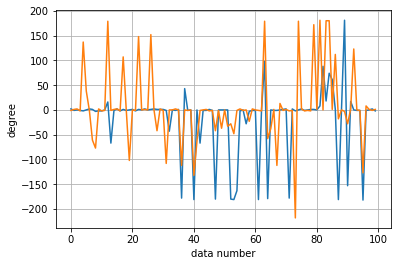

In [64]:
plt.plot(diff)
plt.ylabel("degree")
plt.xlabel("data number")

plt.grid()

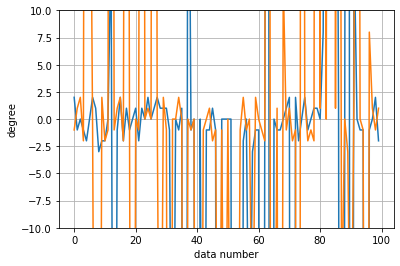

In [65]:
plt.plot(diff)
plt.ylabel("degree")
plt.xlabel("data number")
plt.ylim(-10,10)
plt.grid()

電子線の場合と比較して推論が間違えている場合が多い。

複数角度ではなく、一つの照射角度での線量分布を計算する。